In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import requests
import json
from itertools import chain

import seaborn as sns

import pandas as pd

import csv


# Use existing probe list

In [2]:
v4_probes = v6_probes = []
with open("metadata/probe_v4_list.json", "r") as f:
    v4_probes = json.load(f)
with open("metadata/probe_v6_list.json", "r") as f:
    v6_probes = json.load(f)


In [5]:
probes = v4_probes + v6_probes

In [11]:
coords = pd.DataFrame(columns=['lon', 'lat'])
for r in probes:
    if 'geometry' in r:
        r_geo = r['geometry']
        if r_geo != None:
            if 'coordinates' in r_geo:
                coords.loc[len(coords)] = [r['geometry']['coordinates'][0], r['geometry']['coordinates'][1]]
coords

,lon,lat
0,4.9275,52.3475
1,0.1575,52.2205
2,5.2175,52.3695
3,6.0385,51.2285
4,5.1195,52.0905
...,...,...
3574,-101.8905,33.5475
3575,-81.6795,41.4085
3576,-2.2385,53.4805
3577,-82.7505,27.9575


In [15]:
coords.drop_duplicates(inplace=True)

In [16]:
sns.set_context('paper')
sns.set_palette("Set1", desat=.75)

In [19]:
lon = coords['lon'].to_list()
lat = coords['lat'].to_list()

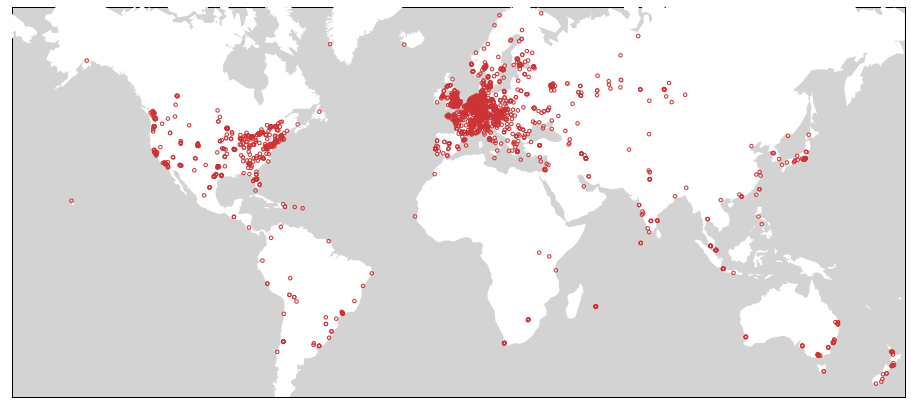

In [27]:
# Draw the map background
fig = plt.figure(figsize=(16, 16))
m = Basemap(projection='merc', resolution='c',
            llcrnrlat=-50,urcrnrlat=70,
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20)
#m.shadedrelief(scale=0.2)
m.fillcontinents(color='white',lake_color='white', zorder=1)
m.drawmapboundary(fill_color='lightgray', zorder=0)
#m.drawcoastlines(linewidth=0.15, zorder=2)#, color='C0')
#m.drawcountries(linewidth=0.15, zorder=3)

m.scatter(lon, lat, 12, latlon=True, marker='o', facecolors='none', color='C0', zorder=10, linewidth=1)
fig.savefig('plots/map.pdf', format='pdf', bbox_inches='tight')

In [28]:
country_codes = []
for r in probes:
    country_codes.append(r['country_code'])

In [29]:
df = pd.Series(country_codes)

In [30]:
df.value_counts()

DE    664
US    528
FR    437
NL    198
GB    195
     ... 
BH      1
MT      1
LB      1
AD      1
SN      1
Length: 89, dtype: int64

In [35]:
with open("metadata/probe_v4_id_list.csv", "r") as f:
    reader = csv.reader(f)
    tmp_list = list(reader)
    id_list = [item for sublist in tmp_list for item in sublist]
print(pd.Series(id_list).nunique())
with open("metadata/probe_v6_id_list.csv", "r") as f:
    reader = csv.reader(f)
    tmp_list = list(reader)
    tmp = [item for sublist in tmp_list for item in sublist]
print(pd.Series(tmp).nunique())
id_list = id_list + tmp
print(pd.Series(id_list).nunique())

2491
1090
2502


In [34]:
pd.Series(id_list).nunique()

2502

In [36]:
probes

[{'address_v4': '82.95.114.207',
  'address_v6': '2001:983:ba7e:1:fad1:11ff:fea9:f090',
  'asn_v4': 3265,
  'asn_v6': 3265,
  'country_code': 'NL',
  'description': None,
  'first_connected': 1359734868,
  'geometry': {'type': 'Point', 'coordinates': [4.9275, 52.3475]},
  'id': 10001,
  'is_anchor': False,
  'is_public': True,
  'last_connected': 1600187974,
  'prefix_v4': '82.92.0.0/14',
  'prefix_v6': '2001:980::/30',
  'status': {'id': 1, 'name': 'Connected', 'since': '2020-09-14T09:39:17Z'},
  'status_since': 1600076357,
  'tags': [{'name': 'DSL', 'slug': 'dsl'},
   {'name': 'Home', 'slug': 'home'},
   {'name': 'NAT', 'slug': 'nat'},
   {'name': 'Native IPv6', 'slug': 'native-ipv6'},
   {'name': 'IPv6', 'slug': 'ipv6'},
   {'name': 'system: V3', 'slug': 'system-v3'},
   {'name': 'system: Resolves A Correctly',
    'slug': 'system-resolves-a-correctly'},
   {'name': 'system: Resolves AAAA Correctly',
    'slug': 'system-resolves-aaaa-correctly'},
   {'name': 'system: IPv4 Works', 's

In [37]:
v4ASNs = []
v6ASNs = []
for r in probes:
    if 'asn_v4' in r:
        v4ASNs.append(r['asn_v4'])
    if 'asn_v6' in r:
        v6ASNs.append(r['asn_v6'])
pd.Series(v4ASNs + v6ASNs).nunique()

729